In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

BISECTION METHOD #1
- Universal: Works for any continuous function within a defined interval.
- Slow convergence: Requires many iterations to reach desired accuracy.

The error is 1.5
Bisection Method gives root at x =  -0.5


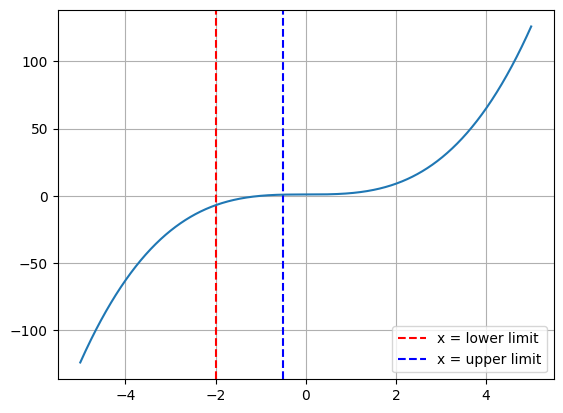

In [2]:
%matplotlib inline
#This means any plots you create using Matplotlib commands will be displayed directly within the notebook or shell, next to the code that generated them. You don't need to use the plt.show() command.

import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**3 + 1

def bisection_method(a, b, error_accept):      # a = lower range limit, b = upper range limit,                                                           func = function of which root is to be obtained,                                           error_accept = smallest division to be checked for finding root
    
    error = abs(b-a)         # absolute value of b-a
    
    while error > error_accept:
        c = (a+b)/2

        if f(a)*f(b) >= 0:
            print("No root/multiple roots present.")
            
        elif f(a)*f(c) < 0:
            b = c
            error = abs(b-a)
        
        elif f(b)*f(c) < 0:
            a = c
            error = abs(a-b)
            
        print(f"The error is {error}")
        # Draw vertical lines at x=a and x=b with different colors
        plt.axvline(x=a, color='r', linestyle='--', label='x = lower limit')
        plt.axvline(x=b, color='b', linestyle='--', label='x = upper limit')
        plt.legend()
        return c
    
answer = bisection_method(-2, 1, 0.05)
print("Bisection Method gives root at x = ", answer)

x = np.linspace(-5, 5, 1000)
plt.plot(x, f(x))
plt.grid()



Newton-Raphson Method
- Best for: Smooth, continuous functions with readily available and well-behaved derivatives.
- Not ideal for: Functions with discontinuities, sharp corners, or zero derivatives at the root.


In [3]:
from sympy import *

x = Symbol('x')
f = x**3 - 2*x - 5
f_prime = f.diff(x)

def newton_raphson(x1, max_iter, error_accept):
    x0 = 0
    for i in range(1, max_iter):
        while abs(x1 - x0) > error_accept:
            x0 = x1
            x1 = x1 - (f.subs(x, x1).evalf() / f_prime.subs(x, x1).evalf())  # Use subs method
            print(f"{i:3d} x: {x1:.3f} f(x): {abs(x1-x0):.3f}")
            i += 1

newton_raphson(2, 20, 0.005)


  1 x: 2.100 f(x): 0.100
  2 x: 2.095 f(x): 0.005
  3 x: 2.095 f(x): 0.000


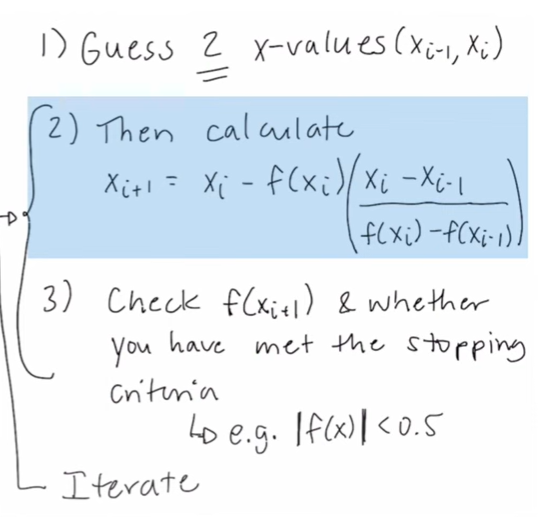

Secant Method
- Similar to Newton-Raphson: Requires derivatives but less sensitive to zero derivatives.
- May not converge: For functions with large changes in slope near the root.


In [4]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return (x**3 - x*x + x - 5)

def secant(x1, x2, error_accept, max_iter):      #x1 and x2 are guessed values to start with a secant
    for i in range(1,max_iter):
        fx1 = f(x1)
        fx2 = f(x2)
        print(f"{i:3d} x: {x2:.3f} f(x): {f(x2):.3f}")
        if abs(fx2)<error_accept:
            break
        x3 = x2 - f(x2)*(x2 - x1)/(f(x2)-f(x1))
        x1 = x2
        x2 = x3
        
secant(6, 4, 0.005, 20)
    
    

  1 x: 4.000 f(x): 47.000
  2 x: 3.299 f(x): 23.307
  3 x: 2.608 f(x): 8.553
  4 x: 2.208 f(x): 3.102
  5 x: 1.981 f(x): 0.829
  6 x: 1.898 f(x): 0.131
  7 x: 1.882 f(x): 0.007
  8 x: 1.881 f(x): 0.000


Fixed Point Iteration Method
* x^3 + 4x^2 - 10 = 0                              #f(x)
* x = 0.5 X pow(x^3, 0.5)                      #convert to format x = g(x)

- Suitable for: Functions expressible as g(x) = x, where g(x) is continuous and has a fixed point within the chosen interval.
- Convergence depends on: Specific function and initial guess. May not converge in all cases.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def g(p):
    return 0.5*pow(10 - p**3, 0.5)

def fixed_pt(x0, max_iter, error_accept):      #x0 is initial guess or starting point position of x
    i = 1
    while(i <= max_iter):
        x = g(x0)
        if np.abs(x0 - x) < error_accept:
            break
        print(i,"th iteration"," ",x)
        i += 1
        x0 = x
    if(i>max_iter):
        print("The method failed after max iterations")
    else:
        print("The method is successful")
    
fixed_pt(1, 100, 0.00005)

1 th iteration   1.5
2 th iteration   1.286953767623375
3 th iteration   1.4025408035395783
4 th iteration   1.3454583740232942
5 th iteration   1.3751702528160383
6 th iteration   1.360094192761733
7 th iteration   1.3678469675921328
8 th iteration   1.3638870038840212
9 th iteration   1.36591673339004
10 th iteration   1.364878217193677
11 th iteration   1.365410061169957
12 th iteration   1.3651378206692129
13 th iteration   1.3652772085244786
14 th iteration   1.3652058502970472
The method is successful
